In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from Bio import SeqIO
from Bio.Seq import Seq
from Bio.SeqRecord import SeqRecord


In [2]:
# read in tsv file output from mmseqs

clusterDataFile = '/home/allen/projects/bsp/cluster/DB_05.tsv'

############################################################################
cdata = pd.read_csv(clusterDataFile,sep='\t', names=['cluster','id'])
cdata

,cluster,id
0,AccII,5
1,AchA6III,6
2,M.Ade56712I,7
3,S.Aje13652II,10
4,S.AmaHL49I,11
...,...,...
10809,Cginov21II,9185
10810,S.Cho10426I,9186
10811,S.Cho10426I,7104
10812,M.Cje328I,9188



10814 sequences with 4235 clusters
4235 groups formed, one for each cluster


/tmp/ipykernel_14874/2134943016.py:13: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  groupCounts = np.array(groups.apply(len))


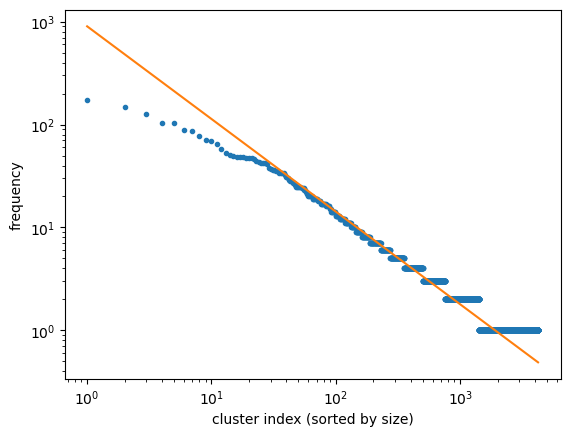

In [3]:
# basic analysis

#############################################################################

# numbers
clusterSet =  set(cdata.cluster) 
numberClusters = len(clusterSet)
numberSequences = len( set(cdata.id) )

print(f'\n{numberSequences} sequences with {numberClusters} clusters')

groups = cdata.groupby('cluster')
groupCounts = np.array(groups.apply(len))
groupNames = np.array(list(groups.indices.keys()))
sortedCounts = np.sort(groupCounts)[::-1]    # reverse sort
print(f'{len(groupCounts)} groups formed, one for each cluster')
#print('sorted cluster counts:\n',groupCounts)

# frequency of site sequences
# a manual fit power law
xx = np.arange(1,len(sortedCounts)+1 )
yy = 900/xx**0.9

plt.figure(0)
plt.ylabel('frequency')
plt.xlabel('cluster index (sorted by size)')
plt.loglog(xx,sortedCounts,'.')
plt.loglog(xx,yy)


In [4]:
np.array(list(groups.indices.keys()))

array(['Aam10684II', 'AatII', 'Aba1056II', ..., 'XmnI', 'XphI', 'Xsp91II'],
      dtype='<U16')

In [246]:
# save it here
# output file names --- 'None' if not saving reformated data

fastaFileName = None #'protein_seqs_repseqs.fasta'

if fastaFileName:     # ---- Convert to SeqRecord objects ----
    records = []
    for _, row in temp.iterrows():
        seq = Seq(str(row["sequence"]).strip())
        records.append(
                    SeqRecord(seq, id=str(row["RE"]), description=row.RE+' '+row.site+' '+row.type)
                    )
        
    # ---- Write to FASTA ----
    SeqIO.write(records, fastaFileName, "fasta")

4235

In [270]:
# now create some selections of sub data bases
# set the min-seq-id
min_seq_id = 0.5

clusterPickFraction = 0.15

#######################################################################

picks = np.random.choice([True, False],numberClusters,p=[clusterPickFraction,1-clusterPickFraction])
remaining = ~picks

pickGroupsSizes = groupCounts[ picks ]
remainingGroupsSizes = groupCounts[ remaining ]

print('\npick groups:\n',pd.Series(pickGroupsSizes).describe())
print('\nremaining groups:\n',pd.Series(remainingGroupsSizes).describe())


pick groups:
 count    619.000000
mean       2.321486
std        5.289824
min        1.000000
25%        1.000000
50%        1.000000
75%        2.000000
max       78.000000
dtype: float64

remaining groups:
 count    3616.000000
mean        2.593197
std         7.049412
min         1.000000
25%         1.000000
50%         1.000000
75%         2.000000
max       172.000000
dtype: float64


In [272]:
# let take a data set made of representative sequence from each cluster

representativePicks =  groupNames[ picks ]
representativeRemaining = groupNames[ remaining ]

print('\nnumber of sequences:', numberSequences )
print('number of clusters:', numberClusters )
print('number of picked sequences:', len(representativePicks), len(representativePicks)/numberSequences )
print('number of remaining sequences:', len(representativeRemaining), len(representativeRemaining)/numberSequences )

        


number of sequences: 10814
number of clusters: 4235
number of picked sequences: 619 0.05724061401886443
number of remaining sequences: 3616 0.3343813574995376


In [278]:
0.05724061401886443/(0.3343813574995376+0.05724061401886443)

0.1461629279811098

In [256]:
# now how do I make sure site space is covered?

TypeError: len() of unsized object

In [ ]:
# save it here
# output file names --- 'None' if not saving reformated data

from Bio import SeqIO
from Bio.Seq import Seq
from Bio.SeqRecord import SeqRecord

combinedFileOutput = None # 'protein_seqs_cleaned_6types.csv'
fastaFileName = None #'protein_seqs_cleaned_6types.fasta'

if combinedFileOutput:
    temp[['RE', 'type', 'site','sequence' ]].to_csv(combinedFileOutput,index=False)

if fastaFileName:     # ---- Convert to SeqRecord objects ----
    records = []
    for _, row in temp.iterrows():
        seq = Seq(str(row["sequence"]).strip())
        records.append(
                    SeqRecord(seq, id=str(row["RE"]), description=row.RE+' '+row.site+' '+row.type)
                    )
        
    # ---- Write to FASTA ----
    SeqIO.write(records, fastaFileName, "fasta")